In [1]:
import cv2
import os
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

In [2]:
mp_holistic=mp.solutions.holistic #Holistic model for downloading the model
mp_drawing=mp.solutions.drawing_utils #Drawing utilities for drawing

In [5]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color convertion brg2rgb
    image.flags.writeable=False #image is no longer writiable
    results=model.process(image) #make prediction
    image.flags.writeable=True #image is now writiable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color convertion rgb2brg
    return image,results

In [6]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)     #draw face connections so mp_holistic.allconnection are immutable
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)      #pose con
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #left hand conn
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)#rigth hand conn

In [7]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))     
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=1))      
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1)) 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1))

In [9]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read fead
        ret,frame=cap.read()
        frame=cv2.resize(frame,(900,500))
        #make detections and results are in mediapipe
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        #draw landmarks
        draw_styled_landmarks(image,results)
        #show to the screen
        cv2.imshow('video cam',image)
        #beake gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
#results has many differenttype of landmarks each defies a perticular key element

In [51]:
frame.shape

(480, 640, 3)

In [9]:
#draw_landmarks(frame,results)

In [10]:
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
#plt.imshow(frame)

In [12]:
#mp_drawing.draw_landmarks??

In [13]:
                                          #Extracting key points

In [14]:
#len(results.pose_landmarks.landmark)
#results.pose_landmarks

In [15]:
#pose=[]
#for res in results.pose_landmarks.landmark:
    #test=np.array([res.x,res.y,res.z,res.visibility])
    #pose.append(test)
#same thing in list comprehension

In [16]:
#if results dont see a landmarks it throws an error so we have to error handel

In [17]:
#pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [18]:
# lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [19]:
# rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
# face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
#test

In [22]:
#face.shape

In [10]:
pose1 = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose1.append(test)

In [11]:
pose1

[array([ 0.596771  ,  0.2994878 , -0.04669205]),
 array([ 0.59786737,  0.24741955, -0.05366201]),
 array([ 0.59622866,  0.27489534, -0.03686598]),
 array([ 0.58674246,  0.21392384, -0.02762503]),
 array([ 0.5976944 ,  0.23264118, -0.05305044]),
 array([ 0.59661096,  0.21936499, -0.04381499]),
 array([ 0.59350199,  0.19371596, -0.00197564]),
 array([0.51805073, 0.22209299, 0.03028171]),
 array([0.59220129, 0.16912261, 0.0161374 ]),
 array([0.59193534, 0.15057603, 0.02135732]),
 array([0.58935881, 0.09563419, 0.05691853]),
 array([ 0.59679329,  0.3062413 , -0.04714523]),
 array([ 0.59660786,  0.31360754, -0.04535683]),
 array([ 0.59624076,  0.31847847, -0.04244066]),
 array([ 0.59591234,  0.32036275, -0.04568701]),
 array([ 0.59620708,  0.32353219, -0.04912919]),
 array([ 0.59634584,  0.32965314, -0.054051  ]),
 array([ 0.59632814,  0.33897939, -0.05648958]),
 array([ 0.59599382,  0.36574727, -0.05342787]),
 array([ 0.59736788,  0.25874418, -0.05085941]),
 array([ 0.58658594,  0.2646383 

In [12]:
np.shape(np.array(pose1))

(468, 3)

In [13]:
#rh

In [13]:
def exract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [14]:
result=exract_keypoints(results)

In [15]:
result

array([ 0.58273822,  0.26300099, -1.28213024, ...,  0.        ,
        0.        ,  0.        ])

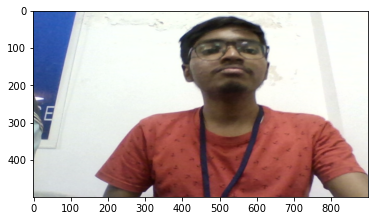

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [25]:
                                #setting up folders for collections

In [18]:
#path for exported data
DATA_PATH=os.path.join('MP_Data')

#actions that we try to detect
actions=np.array(['hello','thanks','iloveyou'])

#thirty video worth of data
no_sequences=30
#videos are going to be 30 frames in length
sequence_length=30

In [19]:
#creating for all actions
#hello
#sub folders
    ##0,
    ##1,
    #.....
    #30
#thanks


#iloveyou

In [20]:
DATA_PATH

'MP_Data'

In [21]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [15]:
##collecting keypoints and training and testing

In [22]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #loop through sequence and actions
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                # read fead
                ret,frame=cap.read()
                frame=cv2.resize(frame,(900,500))
                #make detections and results are in mediapipe
                image,results=mediapipe_detection(frame,holistic)
                print(results)
                #draw landmarks
                draw_styled_landmarks(image,results)
                
                #apply collection wait logic
                if frame_num==0:
                    cv2.putText(image,"Starting collection",(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                
                    cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,    cv2.LINE_AA)
                    
                    cv2.waitKey(2000)
                else:
                     cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA) 
                     
                keypoints=exract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show to the screen
                cv2.imshow('video cam',image)
                #beake gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
cap.release()
cv2.destroyAllWindows()

### training split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
lable_map={}
i=0
for action in actions: 
    lable_map.update({action:i})
    i+=1

In [27]:
lable_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(lable_map[action])


In [29]:
sequences

[[array([ 0.63871926,  0.32427013, -0.73429644, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.62420619,  0.27890229, -1.10081828, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60894573,  0.26721826, -1.19275594, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60521907,  0.25904194, -1.41439974, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60407054,  0.25826666, -1.54999447, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60388672,  0.25700325, -1.25714862, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60408014,  0.2546019 , -1.21781635, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.6022929 ,  0.25280258, -1.17094088, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60222709,  0.25205353, -1.03873456, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.60704869,  0.25307783, -1.11175346, ...,  0.        ,
       

In [30]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [31]:
np.array(sequences).shape

(90, 30, 1662)

In [32]:
np.array(labels).shape

(90,)

In [33]:
labels[29]

0

In [34]:
x=np.array(sequences)

In [35]:
x.shape

(90, 30, 1662)

In [36]:
y=to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
np.array(y).shape

(90, 3)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [40]:
X_train.shape

(85, 30, 1662)

In [41]:
y_test.shape

(5, 3)

# models

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 132ms/step - loss: 2.0234 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 178ms/step - loss: 1.1317 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 154ms/step - loss: 1.0883 - categorical_accuracy: 0.3765
Epoch 4/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.0968 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1927 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0658 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0608 - categorical_accuracy: 0.4941
Epoch 8/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0234 - categorical_accuracy: 0.5882
Epoch 9/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.9142 - categorical_accuracy: 0

In [41]:
res=[.2,.7,.1]

In [42]:
actions[np.argmax(res)]

'thanks'

In [43]:
res=model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [44]:
res

array([[0.31270266, 0.3435111 , 0.3437862 ],
       [0.31268695, 0.34349513, 0.34381795],
       [0.312701  , 0.3435094 , 0.34378958],
       [0.31269428, 0.34350246, 0.34380326],
       [0.31269678, 0.34350508, 0.34379813]], dtype=float32)

In [45]:
actions[np.argmax(res[4])]

'iloveyou'

In [37]:
actions[np.argmax(y_test[4])]

'thanks'

In [49]:
model.save('action.h5')

In [60]:
from tensorflow.keras.models import load_model

loaded_model=load_model('highaccuracymodel.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [47]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [48]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [130]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.2

In [132]:
keypoints.shape

(1662,)

In [61]:
sequence = [] # we need 30 frame of data to actually predict
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic in order 
        keypoints = exract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = loaded_model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            cv2.putText(image,actions[np.argmax(res)] , (3,30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()





<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti